### Car Price Prediction
#### Data Set: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [2]:
#Importing the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [3]:
df=pd.read_csv("car data.csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [132]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.duplicated().sum()

In [10]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [11]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
#Numerical and Categorical Variables
numerical_cols=[cols for cols in df.columns if df[cols].dtypes!='O']
categorical_cols = [cols for cols in df.columns if df[cols].dtypes=='O']

In [14]:
print('We have {} numerical features : {}'.format(len(numerical_cols), numerical_cols))
print('We have {} categorical features : {}'.format(len(categorical_cols), categorical_cols))

We have 5 numerical features : ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
We have 4 categorical features : ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [15]:
#Printing Values Present in those columns (Method 1)
for cols in categorical_cols:
    if cols!='Car_Name': #As there are to many car values
        print(f'{cols}: {df[cols].value_counts().index.values}')

Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Seller_Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']


In [16]:
#Printing Values Present in those Categorical columns (Method 2)
for cols in categorical_cols:
    if cols!='Car_Name':
        print(f'{cols}: {df[cols].unique()}')

Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Seller_Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']


In [25]:
#Printing number of rows with those values for categorical columns
for cols in categorical_cols:
    if cols!='Car_Name':
        print(cols,'------')
        print(df[cols].value_counts())

Fuel_Type ------
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Seller_Type ------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Transmission ------
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Data Visualization
* Nummerical Columns
* Categorical Columns

In [26]:
df[numerical_cols].head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


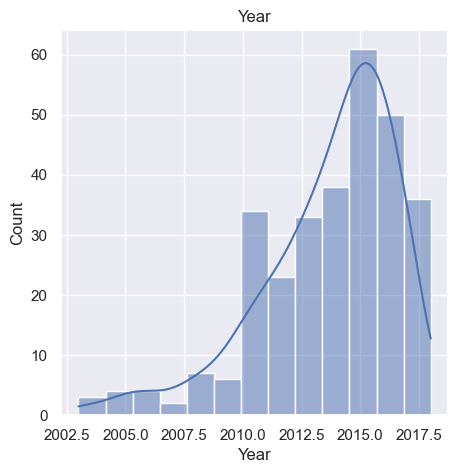

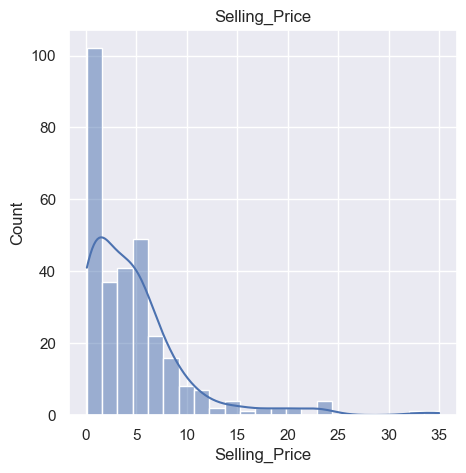

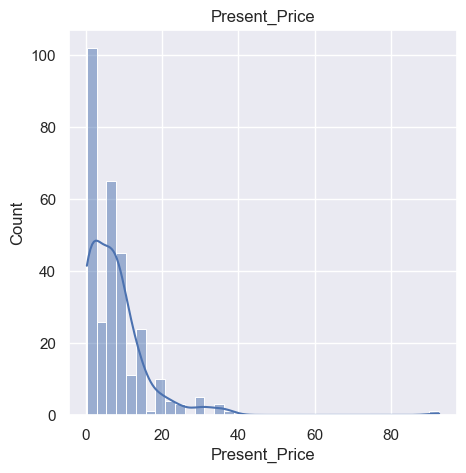

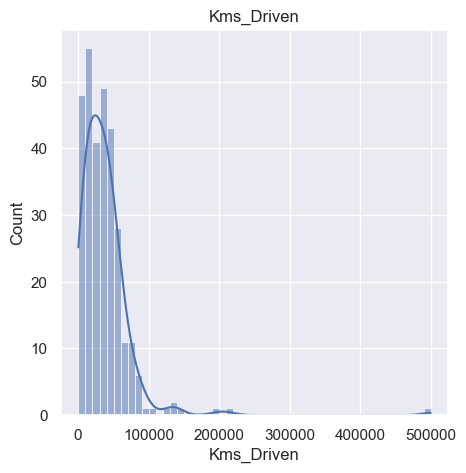

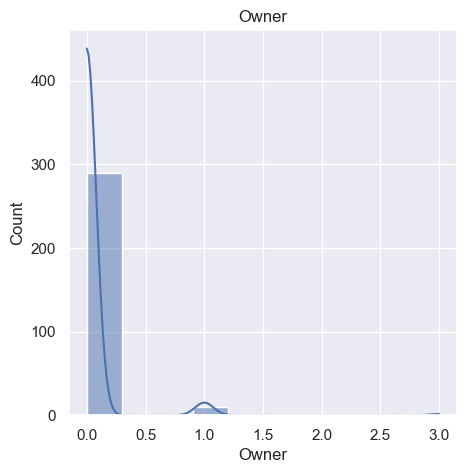

In [158]:
#Numerical Columns
sns.set_style('darkgrid')
for cols in df[numerical_cols].columns:
    plt.figure(figsize=(5,5))
    sns.histplot(data=df[numerical_cols],x=cols,kde=True)
    plt.title(cols)
    plt.show()

In [163]:
#Correlation between the variables
df.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.0,0.2361409801604347,-0.04758420974573064,-0.5243420406957324,-0.18210355920226318
Selling_Price,0.2361409801604347,1.0,0.8789825451614949,0.02918709067429123,-0.08834409908720228
Present_Price,-0.04758420974573064,0.8789825451614949,1.0,0.20364703400913206,0.008057015342196454
Kms_Driven,-0.5243420406957324,0.02918709067429123,0.20364703400913206,1.0,0.08921620186144577
Owner,-0.18210355920226318,-0.08834409908720228,0.008057015342196454,0.08921620186144577,1.0


In [164]:
df.corr(numeric_only=True).index

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

<Axes: >

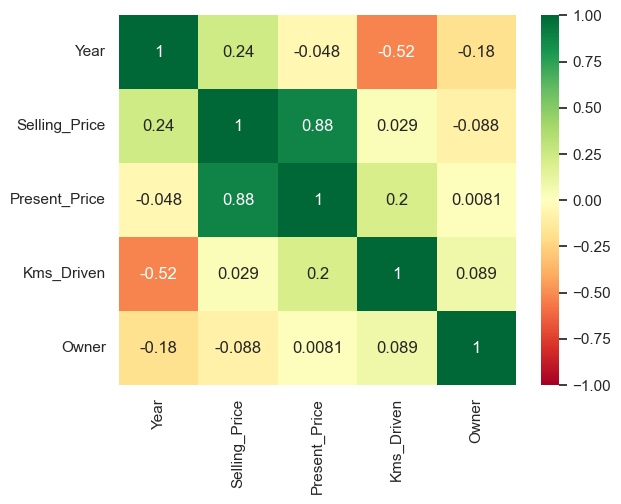

In [165]:
sns.heatmap(df.corr(numeric_only=True), cmap='RdYlGn', vmin=-1, vmax= 1 , annot=True)

#### Selling_Price is Postively corelated with present price

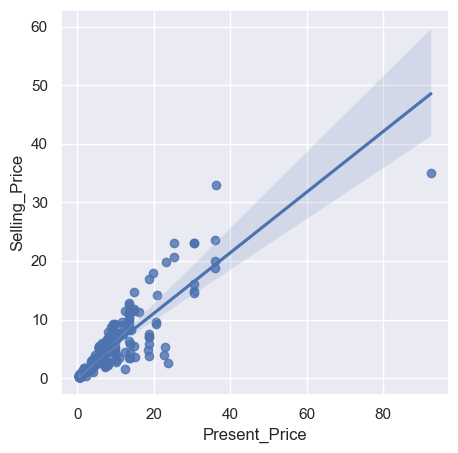

In [176]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
sns.regplot(x= df['Present_Price'], y= df['Selling_Price'])
plt.show()

In [96]:
#Categorical Columns
df[categorical_cols].head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


<Figure size 500x500 with 0 Axes>

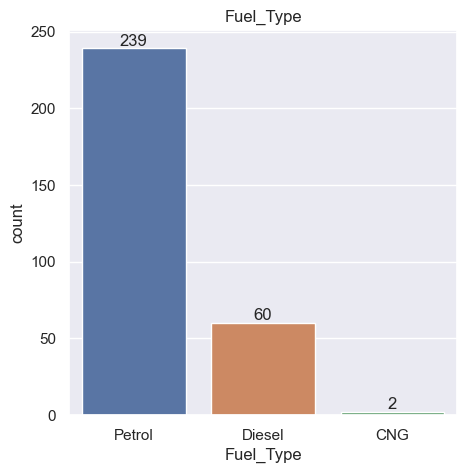

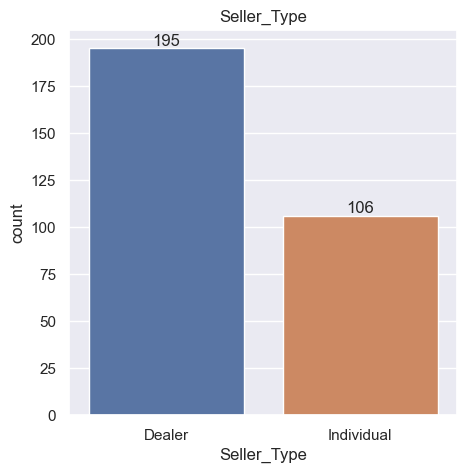

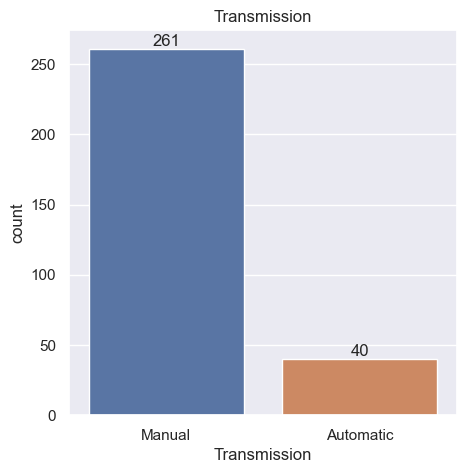

In [178]:
sns.set_style('darkgrid')
for cols in df[categorical_cols].columns:
    plt.figure(figsize=(5,5)) #Figure Size has Parameters Width Size and Height Size
    if cols != 'Car_Name':
        ax=sns.countplot(x=df[categorical_cols][cols])
        for i in ax.containers:
            ax.bar_label(i)
            plt.title(cols)
            plt.show()

#### Feature Engineering

In [13]:
df_fe=df.copy()

In [30]:
df_fe.columns.values

array(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], dtype=object)

#### Dropping Car Name column as it has many categorical values and no relationship with the selling price.

In [14]:
df_fe=df_fe.drop('Car_Name',axis=1)

In [32]:
df_fe.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Adding additional column which is current year

In [15]:
df_fe['Current Year']=2022

In [16]:
df_fe.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [17]:
# Subtracting year from current year column to find out number of years
df_fe['No_of_years']=df_fe['Current Year']-df_fe['Year']

In [18]:
df_fe.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [19]:
#Dropping Year column and current year column as we no longer require it
df_fe.drop(['Year','Current Year'],axis=1,inplace=True)

In [20]:
df_fe.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


### Converting categorical variables into dummy variables

In [50]:
df_fe=pd.get_dummies(df_fe,drop_first=True)

In [51]:
df_fe.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [42]:
df_fe.dtypes

Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
No_of_years                 int64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Seller_Type_Individual      uint8
Transmission_Manual         uint8
dtype: object

### Model Building

In [53]:
X=df_fe.drop(['Selling_Price'],axis=1) #df_fe.iloc[:,1:]
y=df_fe['Selling_Price'] #df_fe.iloc[:,0]

In [54]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [85]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=42)
model.fit(X,y)
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
print(model.feature_importances_)

[0.38822 0.04179 0.00045 0.07290 0.22525 0.01288 0.11835 0.14016]


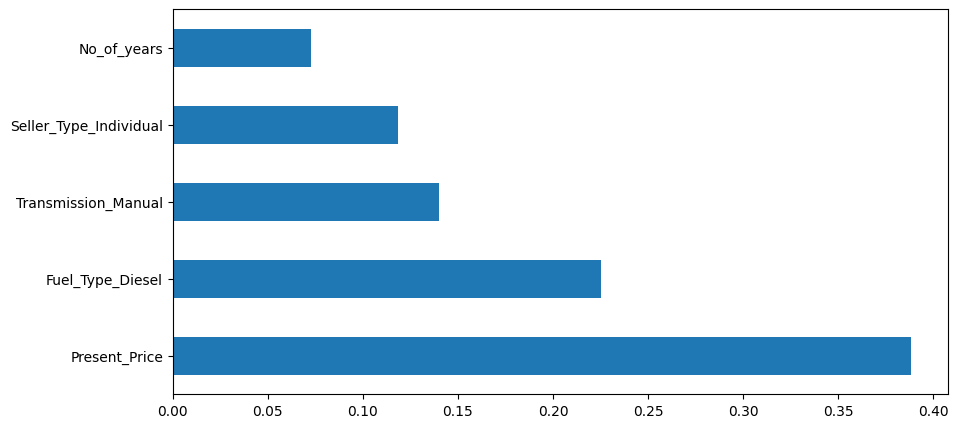

In [86]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print(X_train.shape)
print(X_test.shape)

(240, 8)
(61, 8)


#### Create an Evaluate Function to give all metrics after model Training

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.7157
- Mean Absolute Error: 1.1676
- R2 Score: 0.8887
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8652
- Mean Absolute Error: 1.2162
- R2 Score: 0.8490


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.0044
- Mean Absolute Error: 1.2231
- R2 Score: 0.8480
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.1542
- Mean Absolute Error: 1.4714
- R2 Score: 0.7986


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.7177
- Mean Absolute Error: 1.1687
- R2 Score: 0.8884
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8582
- Mean Absolute Error: 1.2114
- R2 Score: 0.8501


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.4056
- Mean Absolute Error: 3.0454
- R2 Score: 0.2658
-----------------------

In [68]:
print(list(zip(model_list,r2_list)))

[('Linear Regression', 0.848981302489908), ('Lasso', 0.7985538621024055), ('Ridge', 0.8501120632131487), ('K-Neighbors Regressor', -0.023344285000794995), ('Decision Tree', 0.9344384259493129), ('Random Forest Regressor', 0.9583032052364913), ('XGBRegressor', 0.951218185955199), ('CatBoosting Regressor', 0.9692500736049973), ('AdaBoost Regressor', 0.9266830352242457)]


### Model Comparision

In [58]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.969250
5,Random Forest Regressor,0.958303
6,XGBRegressor,0.951218
4,Decision Tree,0.934438
8,AdaBoost Regressor,0.926683
2,Ridge,0.850112
0,Linear Regression,0.848981
1,Lasso,0.798554
3,K-Neighbors Regressor,-0.023344


### Random Forest

In [72]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R-squared score:", r2_score(y_test, predictions))

MAE: 0.6530688524590169
MSE: 1.0639769308196718
RMSE: 1.0314925742920653
R-squared score: 0.953811593976159


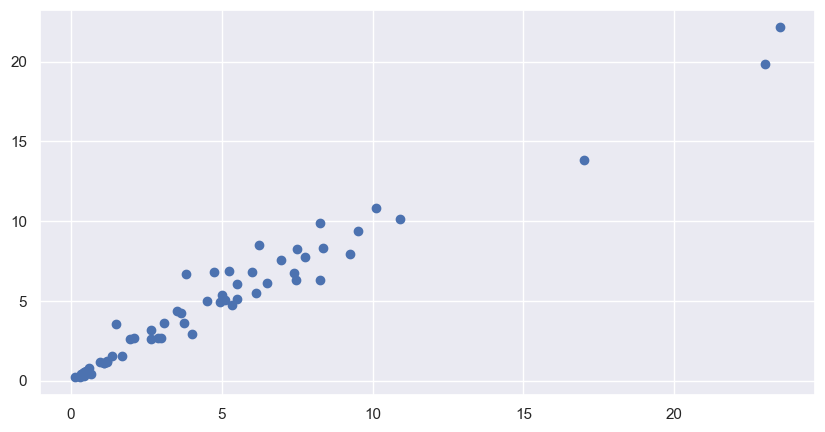

In [76]:
#Comparing y_test with predictions
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions)
plt.show()

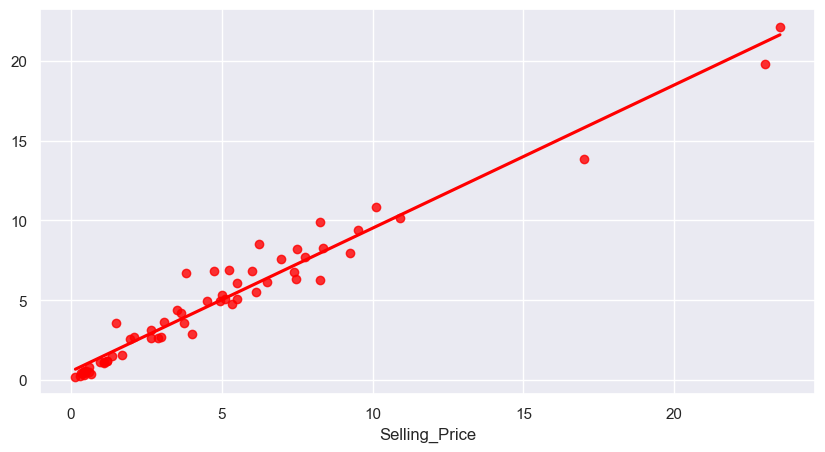

In [77]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=predictions,ci=None,color ='red');

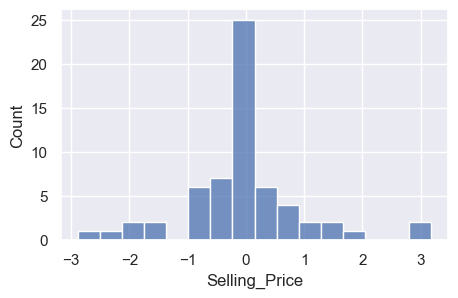

In [78]:
plt.figure(figsize=(5,3))
sns.histplot(y_test-predictions)
plt.show()

### Comparing the predicted prices with actual prices

In [80]:
compare_prices = pd.DataFrame(
    {'Actual Prices': y_test, 'Predicted Prices': predictions}
    )
compare_prices.head()

,Actual Prices,Predicted Prices
177,0.35,0.4263
289,10.11,10.8209
228,4.95,4.9185
198,0.15,0.2153
60,6.95,7.5620
